# Observations

(1) Ramicane and Capomulin have the lowest average tumor volumes, as well as the lowest final tumor volumes, determining that compared to the other treatments (specifically Infubinol and Ceftamin), they decreased the size of the tumor the most. However, both treatments have the most data points which could also be a factor that affected this outcome. 
(2) Capomulin showed a decrease in tumor volume of almost 50% after 45 days of treatment, providing a successful outcome of the treatment. Further analysis regarding the average decrease in tumor volume for the other treatments should be done in order to back-up this conclusion. 
(3) There is a strong positive correlation between mouse weight and tumor volume, as the volume of the tumor increases, the weight of the mouse does so as well. 

# Code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [3]:
# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
combined_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Rename tumor volume
combined_mouse_df=combined_mouse_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume"})
combined_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

mean_volume = combined_mouse_df.groupby("Drug Regimen")["Tumor Volume"].mean()
median_volume = combined_mouse_df.groupby("Drug Regimen")["Tumor Volume"].median()
variance_volume = combined_mouse_df.groupby("Drug Regimen")["Tumor Volume"].var()
std_volume = combined_mouse_df.groupby("Drug Regimen")["Tumor Volume"].std()
sem_volume = combined_mouse_df.groupby("Drug Regimen")["Tumor Volume"].sem()

stats_summary_df = pd.DataFrame({"Mean Tumor Volume": mean_volume,
                                "Median Tumor Volume": median_volume,
                                "Variance Tumor Volume": variance_volume,
                                "Std Dev Tumor Volume": std_volume,
                                "SEM Tumor Volume": sem_volume,
                                })
stats_summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std Dev Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


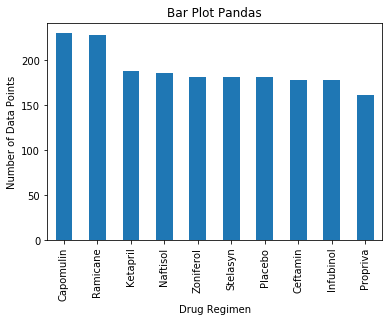

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

pandas_bar = combined_mouse_df["Drug Regimen"].value_counts()
pandas_bar.plot(kind="bar")

plt.title("Bar Plot Pandas")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

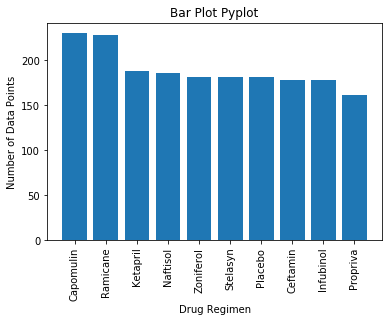

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

pyplot = combined_mouse_df['Drug Regimen'].value_counts()
plt.bar(pyplot.index,pyplot.values)

plt.title("Bar Plot Pyplot")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

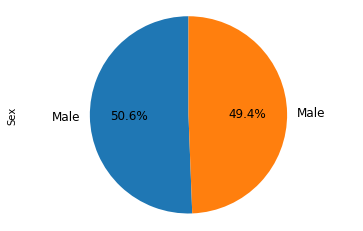

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pandas_pie = combined_mouse_df["Sex"].value_counts()
pandas_pie.plot(kind="pie", autopct='%1.1f%%', startangle=90, shadow=False, labels=combined_mouse_df['Sex'], 
               legend=False, fontsize=12)
plt.axis('equal')
plt.show()

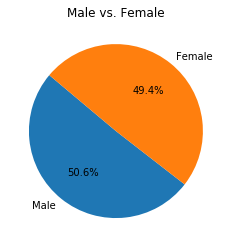

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyplot1 = combined_mouse_df["Sex"].value_counts()
plt.pie(pyplot1.values,labels=pyplot1.index.values,autopct='%1.1f%%', startangle=140)
plt.title("Male vs. Female")
plt.show()

(-0.05, 1.05, -0.05, 1.05)

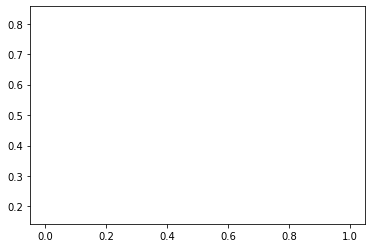

In [17]:
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

In [18]:
# Calculate the final tumor volume of each mouse across 4 of the most promising treatment regimens 
# Sort data by treatment, mouse id and timepoint  
sorted_df = combined_mouse_df.sort_values(["Mouse ID", "Drug Regimen", "Timepoint"], ascending=True)
# Select final volume based on timepoint
final_volume_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
final_volume_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,483,a262,Placebo,Female,17,29,45,70.717621,4
3,493,a275,Ceftamin,Female,20,28,45,62.999356,3
4,510,a401,Zoniferol,Female,8,25,45,66.794156,4


In [20]:
# Final tumor volume for Capomulin
capomulin_volume_df = final_volume_df[final_volume_df["Drug Regimen"].isin(["Capomulin"])]
capomulin_volume_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [21]:
# Convert Capomulin Tumor Volume data into a list 
list_capomulin = capomulin_volume_df.sort_values(["Tumor Volume"], ascending=True).reset_index()
list_capomulin = list_capomulin["Tumor Volume"]
list_capomulin

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume, dtype: float64

In [26]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = list_capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [27]:
# Final tumor volume for Ramicane
ramicane_volume_df = final_volume_df[final_volume_df["Drug Regimen"].isin(["Ramicane"])]
ramicane_volume_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,327,a411,Ramicane,Male,3,22,45,38.407618,1
1,430,a444,Ramicane,Female,10,25,45,43.047543,0
2,214,a520,Ramicane,Male,13,21,45,38.810366,1
3,174,a644,Ramicane,Female,7,17,45,32.978522,1
4,154,c758,Ramicane,Male,9,17,45,33.397653,1


In [28]:
# Convert Ramicane Tumor Volume data into a list 
list_ramicane = ramicane_volume_df.sort_values(["Tumor Volume"], ascending=True).reset_index()
list_ramicane = list_ramicane["Tumor Volume"]
list_ramicane

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor Volume, dtype: float64

In [29]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = list_ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 30.981175224999998
The upper quartile of tumor volume is: 38.508305307499995
The interquartile range of tumor volume is: 7.527130082499998
The the median of tumor volume is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [30]:
# Final tumor volume for Infubinol
infubinol_volume_df = final_volume_df[final_volume_df["Drug Regimen"].isin(["Infubinol"])]
infubinol_volume_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,540,a685,Infubinol,Male,8,30,45,66.083066,3
3,637,c139,Infubinol,Male,11,28,45,72.226731,2
4,800,e476,Infubinol,Male,23,26,45,62.435404,1


In [31]:
# Convert Infubinol Tumor Volume data into a list 
list_infubinol = infubinol_volume_df.sort_values(["Tumor Volume"], ascending=True).reset_index()
list_infubinol = list_infubinol["Tumor Volume"]
list_infubinol

0    60.918767
1    62.435404
2    62.754451
3    65.525743
4    66.083066
5    66.196912
6    67.685569
7    67.973419
8    72.226731
Name: Tumor Volume, dtype: float64

In [32]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = list_infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 62.75445141
The upper quartile of tumor volume is: 67.68556862
The interquartile range of tumor volume is: 4.9311172099999965
The the median of tumor volume is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


In [33]:
# Final tumor volume for Ceftamin
ceftamin_volume_df = final_volume_df[final_volume_df["Drug Regimen"].isin(["Ceftamin"])]
ceftamin_volume_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,493,a275,Ceftamin,Female,20,28,45,62.999356,3
1,993,j296,Ceftamin,Female,24,30,45,61.849023,3
2,1033,k210,Ceftamin,Male,15,28,45,68.923185,3
3,1112,l471,Ceftamin,Female,7,28,45,67.748662,1
4,1132,l661,Ceftamin,Male,18,26,45,59.851956,3


In [34]:
# Convert Ceftamin Tumor Volume data into a list 
list_ceftamin = ceftamin_volume_df.sort_values(["Tumor Volume"], ascending=True).reset_index()
list_ceftamin = list_ceftamin["Tumor Volume"]
list_ceftamin

0     59.741901
1     59.851956
2     61.386660
3     61.433892
4     61.849023
5     62.999356
6     64.299830
7     64.634949
8     64.729837
9     67.527482
10    67.748662
11    68.594745
12    68.923185
Name: Tumor Volume, dtype: float64

In [35]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = list_ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 61.43389223
The upper quartile of tumor volume is: 67.52748237
The interquartile range of tumor volume is: 6.093590140000003
The the median of tumor volume is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


In [43]:
# prepare data for plots
import numpy as np
data = [list_capomulin, list_ramicane, list_infubinol, list_ceftamin]

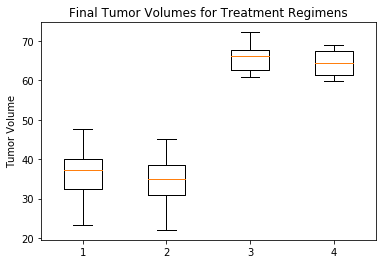

In [45]:
# generate a box and whisker plot of the final tumor volume for all four treatment regimens 
# and highlight any potential outliers in the plot by changing their color and style

fig3, ax3 = plt.subplots()
ax3.set_title('Final Tumor Volumes for Treatment Regimens')
ax3.set_ylabel('Tumor Volume')
ax3.boxplot(data)

plt.show()

In [48]:
# Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.
# Create df of only Capomulin data 

cap_df = combined_mouse_df.loc[combined_mouse_df["Drug Regimen"] == 'Capomulin']
cap_df = cap_df.reset_index()
cap_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [51]:
# Data for single mouse 
cap_mouse_df = cap_df.loc[cap_df["Mouse ID"] == "s185"]
cap_mouse_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


In [66]:
# Filter df to only Timepoint and Tumor Volume
cap_line_df = cap_mouse_df[["Timepoint", "Tumor Volume"]]
cap_line_df = cap_line_df.reset_index(drop=True)
cap_line_df

,Timepoint,Tumor Volume
0,0,45.000000
1,5,43.878496
2,10,37.614948
3,15,38.177232
4,20,36.866876
5,25,33.949940
6,30,32.959671
7,35,28.328531
8,40,25.472143
9,45,23.343598


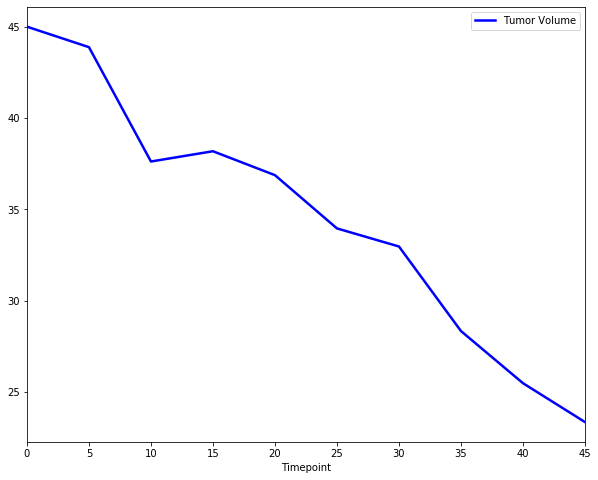

In [67]:
# generate the line plot of Timepoint and Time Volume of single mouse
cap_line_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='blue')

In [82]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
# Filter df to only Weight and Tumor Volume
cap_scatter_df = cap_df[["Mouse ID", "Weight (g)", "Tumor Volume"]]
cap_scatter_df.head()

,Mouse ID,Weight (g),Tumor Volume
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [92]:
# get tumor volume avg and rename column to match data 
cap_vol_avg = pd.DataFrame(cap_scatter_df.groupby(["Mouse ID", "Weight (g)",])["Tumor Volume"].mean())
cap_vol_avg = cap_vol_avg.rename(columns={"Tumor Volume": "Average Volume"}).reset_index()
cap_vol_avg.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [93]:
# set mouse id as index
cap_scatter_df = cap_vol_avg.set_index("Mouse ID")
cap_scatter_df.head()

,Weight (g),Average Volume
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


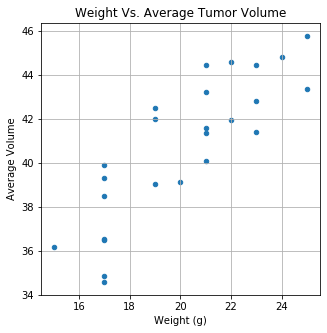

In [96]:
# generate scatter plot
cap_scatter_df.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, 
                    figsize=(5,5), title="Weight Vs. Average Tumor Volume")
plt.show()

In [105]:
# Calculate the correlation coefficient and between mouse weight and average tumor volume for the Capomulin treatment
mouse_weight = cap_scatter_df.iloc[:,0]
avg_tumor_volume = cap_scatter_df.iloc[:,1]
correlation = st.pearsonr(mouse_weight, avg_tumor_volume)
print(f"The correlation betwen both factors is {round(correlation[0],2)}")

The correlation betwen both factors is 0.84


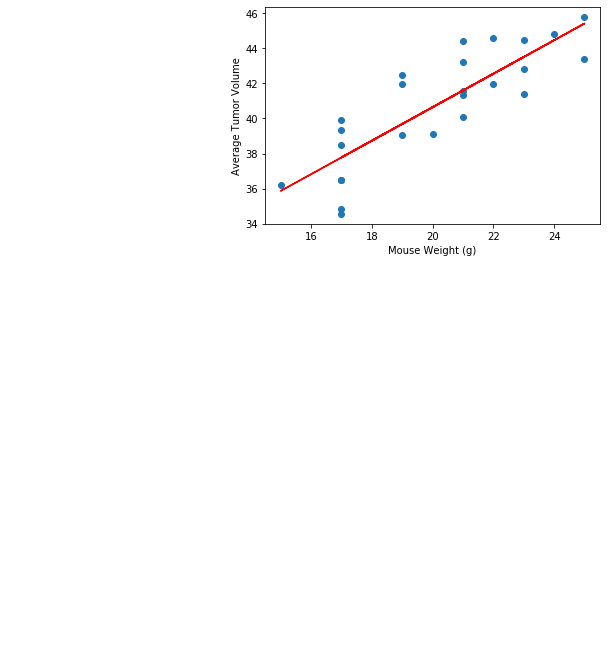

In [110]:
# Calculate linear regression model between mouse weight and average tumor volume for the Capomulin treatment
# Plot the linear regression model on top of the previous scatter plot.
from scipy.stats import linregress
x_values = cap_scatter_df["Weight (g)"]
y_values = cap_scatter_df["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()